## Fifteen-minute Friday: Formatting plot axes

files needed = 'VIXCLSD-1.csv'

Fifteen-minute Fridays are brief, nongraded workbooks that provide some extra practice and introduce new topics for self-guided study. This week we are working on

1. Formatting datetime axes in plots. 
2. Tick  formatting 


In [1]:
# Our standard imports. We will import more along the way.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
vix = pd.read_csv('VIXCLSD-1.csv', na_values='.')
vix['DATE'] = pd.to_datetime(vix['DATE'])
vix = vix.set_index('DATE')
vix.head(8)

,VIXCLS
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
1990-01-09,22.20
1990-01-10,22.44
1990-01-11,20.05


Let's plot the data for January 1992 using the default axis lables. 

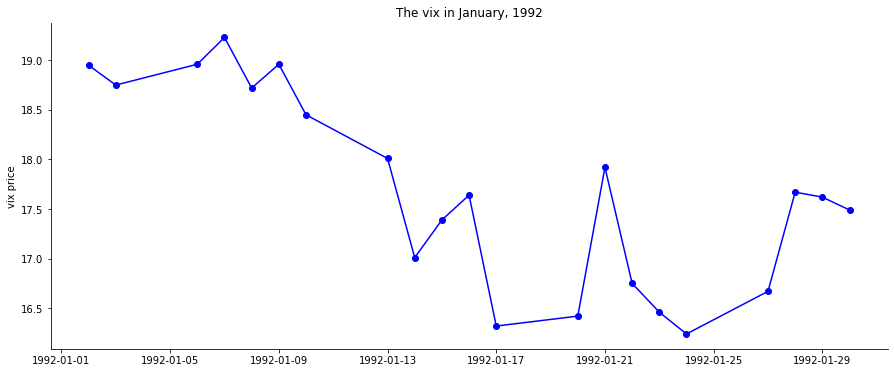

In [3]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

sns.despine(ax=ax)

plt.show()

### Formatting dates

It's not bad, but my title (and presumably the accompanying text) already tells us that this is for 1992, so writing the year each time is unneccesary.

There are two types of ticks on an axis. The **major** and the **minor** ticks. In the figure above, the minor ticks are turned off. matplotlib has a [tick labels demo](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/major_minor_demo.html) with more detail.

To format the dates, we use the `.set_major_formatter()` method. We pass `set_major_formatter()` a DateFormatter object that we set up with the format we want to apply. 

```python 
mdates.DateFormatter("%m/%d")
```

creates the DateFormatter. This code creates the formatter and applies it to the x axis. 

```python
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
```

More on date axes can be found on the matplotlib [date labels demo](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html).

We need to import mdates.

In [4]:
import matplotlib.dates as mdates

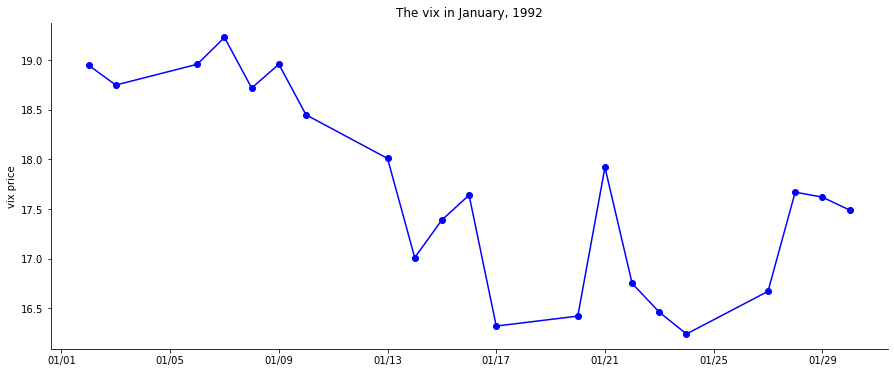

In [5]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))

sns.despine(ax=ax)

plt.show()

With the date format, we can apply any valid [strftmime codes](https://strftime.org/). How about labeling them with the days of the week? That format code is '%a'. 

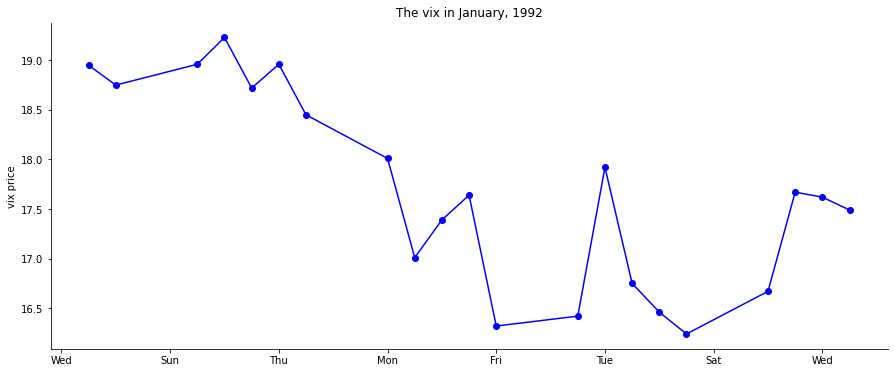

In [6]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%a"))

sns.despine(ax=ax)

plt.show()

### Tick placment

Here we have tick labels in places we do not have data points. The market is not open on the weekends. 

We can control where the ticks are placed by passing `ax.set_xticks()` a Series or numpy array of values. 

```python
ax.set_xticks(tick_data)
```

Let's set the ticks to only occur when we have data. 


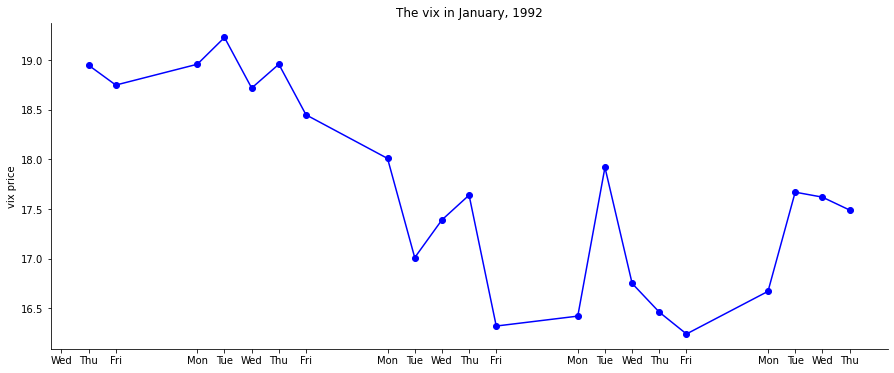

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

ax.set_xticks(temp.index)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%a"))

sns.despine(ax=ax)

plt.show()

Anything we can do with the x axis, we can do with the y axis. Let's set the y-axis major ticks to 16...20.

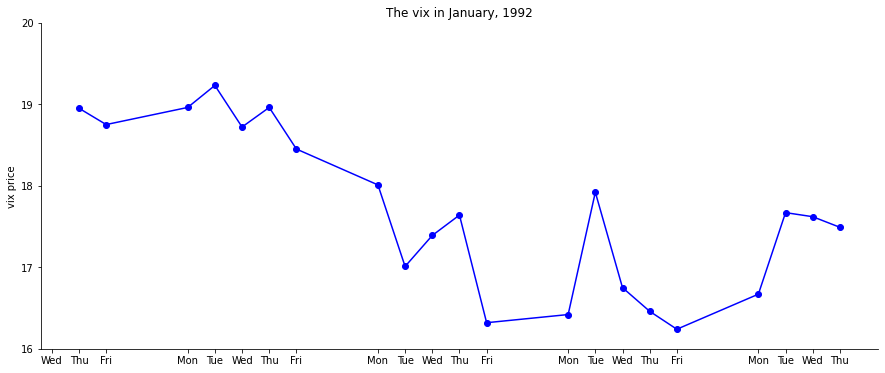

In [8]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

ax.set_xticks(temp.index)
ax.set_yticks(list(range(16,21)))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%a"))

sns.despine(ax=ax)

plt.show()

### Minor ticks

Let's turn on the minor ticks on the y axis. We use the `AutoMinorLocator` to have matplotlib figure out where to place the minor ticks. 

In [9]:
from matplotlib.ticker import AutoMinorLocator

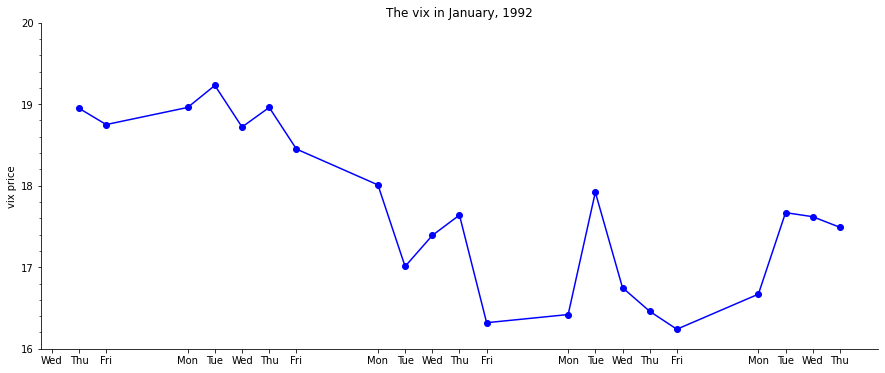

In [10]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

ax.set_xticks(temp.index)


ax.xaxis.set_major_formatter(mdates.DateFormatter("%a"))

# ticks
ax.set_yticks(list(range(16,21)))

# Turn on the minor ticks and have them set automatically.
ax.yaxis.set_minor_locator(AutoMinorLocator())


sns.despine(ax=ax)

plt.show()

### Formating the ticks

We use the `.tick_params()` method to format the ticks. We pass the x or y axis, the minor or major ticks, and the formats. 
There are lots of [options](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html).

Here are some examples. 

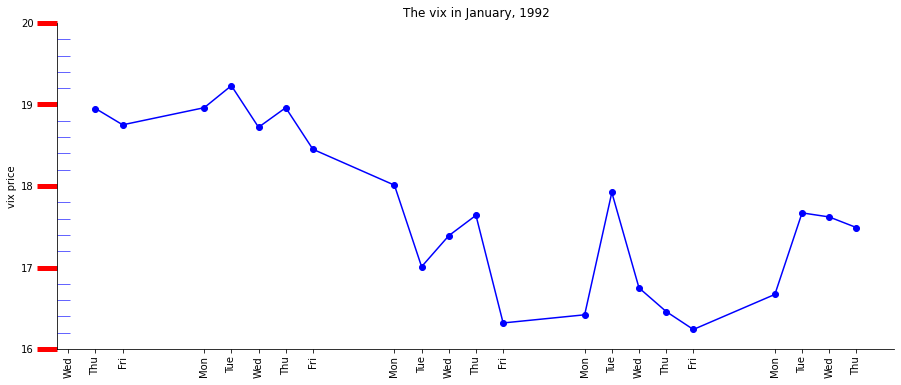

In [17]:
fig, ax = plt.subplots(figsize=(15,6))

temp = vix.loc['1992-01-01':'1992-01-30']

ax.plot(temp.index, temp['VIXCLS'], color='blue', marker='o')

ax.set_ylabel('vix price')
ax.set_title('The vix in January, 1992')

# Formatting for y axis
ax.set_yticks(list(range(16,21)))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='y', which='minor', length=13, color='b', direction='in')
ax.tick_params(axis='y', which='major', length=20, width=5,  color='r')

# The y axis
ax.set_xticks(temp.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%a"))
ax.tick_params(axis='x', which='major', rotation=90)

sns.despine(ax=ax)

plt.show()

## Practice problems

None today! You should go back through the examples and try various formating options. Have some fun!